Question 1. Generate 5 batches of 20 randomly generated RGB images of shape (256,512,3).


In [3]:
# Question 1. Generate 5 batches of 20 randomly generated RGB images of shape (256,512,3).
import numpy as np
# Creation of a class to generate random RGB images 
class RGBImageBatchGenerator:
    # Initialization of the class with default values
    def __init__(self, num_batches=5, batch_size=20, image_shape=(256, 512, 3)):
        """
        Initializes the generator with default or custom values.

        Parameters:
        - num_batches (int): Number of batches to generate.
        - batch_size (int): Number of images per batch.
        - image_shape (tuple): Shape of each image (height, width, channels).
        """
        self.num_batches = num_batches
        self.batch_size = batch_size
        self.image_shape = image_shape
    # Generation of random RGB images
    def generate_random_images(self):
        return  [
            np.random.randint(0, 256, (self.batch_size, *self.image_shape), dtype=np.uint8) 
            for _ in range(self.num_batches)
        ]


In [6]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 1.4 MB/s eta 0:00:0000:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.5 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Note: you may need to restart the kernel to use updated packages.


Now let's test it by showing an image

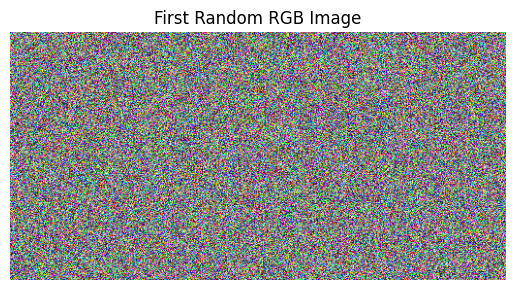

In [7]:
import matplotlib.pyplot as plt

# Create the generator
generator = RGBImageBatchGenerator()

# Generate the image batches
batches = generator.generate_random_images()

# Display the first image of the first batch
plt.imshow(batches[0][0])
plt.title("First Random RGB Image")
plt.axis("off")
plt.show()


 Question 2: 
 Create 2 randomly placed squares of size 50x50 pixels on each image. The squares
 Should not overlap. Turn all pixels in the first square in white and all pixels in the second
 square in black.

Answer 2: 
Adds two randomly placed non-overlapping squares to each image:
    - First square placed randomly
    - Second square placed randomly with custom logic to avoid overlap

Parameters:
    - batch (np.ndarray): A batch of images of shape (N, H, W, 3)
    - square_size (int): The size of the square sides

Returns:
    - Modified batch with squares added


In [8]:
import numpy as np

# Fixed version of the SquareGenerator class
class SquareGenerator:
    def __init__(self, square_size=50):
        self.square_size = square_size

    def generate_squares(self, batch):
        """
        Add white and black squares to each image in the batch
        """
        batch_copy = batch.copy()  # Work on a copy to avoid modifying original
        h, w = batch_copy.shape[1], batch_copy.shape[2]

        for img in batch_copy:
            # First square (white)
            x1 = np.random.randint(0, w - self.square_size)
            y1 = np.random.randint(0, h - self.square_size)

            # Second square (black) - non-overlapping
            x2, y2 = self._generate_non_overlapping(x1, y1, h, w)
            
            # Draw squares on the image
            img[y1:y1+self.square_size, x1:x1+self.square_size] = [255, 255, 255]  # white
            img[y2:y2+self.square_size, x2:x2+self.square_size] = [0, 0, 0]        # black
            
        return batch_copy

    def _generate_non_overlapping(self, x1, y1, height, width):
        """
        Generate coordinates for a second square that doesn't overlap with the first
        """
        attempts = 0
        max_attempts = 100
        
        while attempts < max_attempts:
            x2 = np.random.randint(0, width - self.square_size)
            y2 = np.random.randint(0, height - self.square_size)
            
            # Check if squares overlap
            if not self._squares_overlap(x1, y1, x2, y2):
                return x2, y2
            
            attempts += 1
        
        # If we can't find a non-overlapping position, place it as far as possible
        if x1 + self.square_size < width - self.square_size:
            x2 = x1 + self.square_size
        else:
            x2 = max(0, x1 - self.square_size)
        
        if y1 + self.square_size < height - self.square_size:
            y2 = y1 + self.square_size
        else:
            y2 = max(0, y1 - self.square_size)
            
        return x2, y2
    
    def _squares_overlap(self, x1, y1, x2, y2):
        """
        Check if two squares overlap
        """
        return not (x1 + self.square_size <= x2 or 
                   x2 + self.square_size <= x1 or 
                   y1 + self.square_size <= y2 or 
                   y2 + self.square_size <= y1)


The main public method generate_squares handles the overall task of adding squares to images.

Helper methods _generate_non_overlapping and _squares_overlap encapsulate specific logic for coordinate generation and overlap checking.

This makes the code modular and easy to maintain.

batch_copy = batch.copy() prevents side effects on the input data, respecting immutability principles.

A more elegent way of doing this class could be adding:
Helper _random_coords method reduces duplication when generating random coordinates.

Using a for-loop with early return instead of while and manual counter.

Simplified fallback: using modulo ensures placement wraps within bounds.

Set the white square pixels to 255 instead of [255, 255, 255] — NumPy broadcasts single value across all channels automatically, so cleaner and faster.


In [9]:
# Optimized version of the SquareGenerator class
import numpy as np

class SquareGenerator:
    def __init__(self, square_size=50):
        self.square_size = square_size

    def generate_squares(self, batch):
        batch_copy = batch.copy()
        h, w = batch_copy.shape[1], batch_copy.shape[2]

        for img in batch_copy:
            x1, y1 = self._random_coords(w, h)
            x2, y2 = self._random_coords_non_overlapping(w, h, x1, y1)

            img[y1:y1+self.square_size, x1:x1+self.square_size] = 255  # white
            img[y2:y2+self.square_size, x2:x2+self.square_size] = 0    # black
            
        return batch_copy

    def _random_coords(self, width, height):
        return (
            np.random.randint(0, width - self.square_size),
            np.random.randint(0, height - self.square_size),
        )
    
    def _random_coords_non_overlapping(self, width, height, x1, y1):
        max_attempts = 100
        for _ in range(max_attempts):
            x2, y2 = self._random_coords(width, height)
            if not self._overlap(x1, y1, x2, y2):
                return x2, y2

        # Fallback: place second square at the closest non-overlapping position
        x2 = (x1 + self.square_size) % (width - self.square_size)
        y2 = (y1 + self.square_size) % (height - self.square_size)
        return x2, y2

    def _overlap(self, x1, y1, x2, y2):
        return not (
            x1 + self.square_size <= x2 or
            x2 + self.square_size <= x1 or
            y1 + self.square_size <= y2 or
            y2 + self.square_size <= y1
        )


Test the class SquareGenerator

Original batch shape: (5, 256, 512, 3)
Output batch shape: (5, 256, 512, 3)


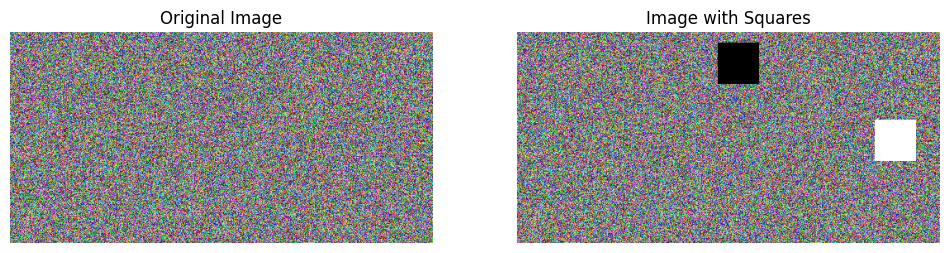

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Your SquareGenerator class here (paste your code)

# Instantiate generator
generator = SquareGenerator(square_size=50)

# Create a dummy batch of 5 images, each 256x512 with 3 channels
batch_size = 5
image_shape = (256, 512, 3)
dummy_batch = np.random.randint(0, 256, (batch_size, *image_shape), dtype=np.uint8)

# Generate squares on the batch
output_batch = generator.generate_squares(dummy_batch)

# Check results and visualize one image
print("Original batch shape:", dummy_batch.shape)
print("Output batch shape:", output_batch.shape)

# Display the first image before and after
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(dummy_batch[0])
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(output_batch[0])
axes[1].set_title("Image with Squares")
axes[1].axis('off')

plt.show()


3. Crop each image randomly so that it is a square of size 200x200 pixels.

In [11]:
def random_crop_200x200(batch):
    cropped_batch = []

    for img in batch:
        h,w = img.shape[:2]
        if h < 200 or w < 200:
            raise ValueError("Image smaller than 200x200; cannot crop.")
        x = np.random.randint(0, w - 200 + 1)
        y = np.random.randint(0, h - 200 + 1)

        cropped = img[y:y+200, x:x+200]
        cropped_batch.append(cropped)

    return np.array(cropped_batch)


4. For each batch (batch_1-5), and each color (White / Black) calculate the average, standard
deviation, minimum and maximum number of pixels in this color.

In [13]:
pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 1.2 MB/s eta 0:00:0000:0100:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np

# First, let's create a complete pipeline that processes all batches
def process_all_batches_and_calculate_stats():
    # Step 1: Generate the batches
    generator = RGBImageBatchGenerator()
    batches = generator.generate_random_images()
    # Step 2: Process each batch through the pipeline
    processed_data = []

    for batch_idx, batch in enumerate(batches):
        batch_name = f"batch_{batch_idx + 1}"
        print(f"Processing {batch_name}...")

        # Add squares to the batch
        square_gen = SquareGenerator(square_size=50)
        batch_with_squares = square_gen.generate_squares(batch.copy())
     
        # Crop each image in the batch
        cropped_batch = random_crop_200x200(batch_with_squares)

      
        # Count pixels for each image in the batch
        for img_idx, img in enumerate(cropped_batch):
            # Count white pixels (RGB = [255, 255, 255])
            white_pixels = np.sum(np.all(img == [255, 255, 255], axis=2))
            
            # Count black pixels (RGB = [0, 0, 0])
            black_pixels = np.sum(np.all(img == [0, 0, 0], axis=2))
            
            # Add to processed data
            processed_data.append({
                'batch': batch_name,
                'image_id': img_idx + 1,
                'color': 'White',
                'pixel_count': white_pixels
            })
            
            processed_data.append({
                'batch': batch_name,
                'image_id': img_idx + 1,
                'color': 'Black',
                'pixel_count': black_pixels
            })

    
    # Create DataFrame
    df = pd.DataFrame(processed_data)
    return df


Now that we have created our dataframe we can process aggreagations.
This code above can be optimized by setting function variables for the processed_data for exemple. I will try to do it later

"""
Calculate statistics for pixel counts by batch and color

Parameters:
df: DataFrame with columns 'batch', 'color', 'pixel_count'

Returns:
DataFrame with statistics grouped by batch and color
"""

In [15]:
def calculate_pixel_statistics(df):

# Group by batch and color, then calculate statistics
    stats = df.groupby(['batch', 'color'])['pixel_count'].agg([
        ('Average', 'mean'),
        ('Std_Deviation', 'std'),
        ('Minimum', 'min'),
        ('Maximum', 'max')
    ]).round(2)

    # Reset index to make batch and color regular columns
    stats = stats.reset_index()
    return stats


The following function will be displaying the different statistics calculated above

In [16]:
def display_detailed_results(stats_df):
    """
    Display results in a formatted way for each batch and color
    """
    print("PIXEL STATISTICS BY BATCH AND COLOR")
    print("=" * 50)
    
    for batch in ['batch_1', 'batch_2', 'batch_3', 'batch_4', 'batch_5']:
        print(f"\n{batch.upper()}:")
        batch_data = stats_df[stats_df['batch'] == batch]
        
        for color in ['White', 'Black']:
            color_data = batch_data[batch_data['color'] == color]
            if not color_data.empty:
                row = color_data.iloc[0]
                print(f"  {color}:")
                print(f"    Average: {row['Average']}")
                print(f"    Std Dev: {row['Std_Deviation']}")
                print(f"    Minimum: {row['Minimum']}")
                print(f"    Maximum: {row['Maximum']}")


We could orchestrated this pipeline with an orchestrator for exemple airflow or Kestra to execute the complete pipeline from generation to statistics calculation.

Because we already used a dataframe before the statistic calculation we will rename the columns and transform to parquet format (which is a very wise choice as Parquet is very performant for OLAP oriented column wharehouse and it's compression options can highly reduce the run time and cost)

In [17]:
def transform_to_parquet_format(stats_df):
    """
    Transform the statistics DataFrame to the required Parquet format:
    batch_id, white_avg, white_min, white_max, white_std, black_avg, black_min, black_max, black_std
    """
    
    # Separate white and black statistics
    white_stats = stats_df[stats_df['color'] == 'White'].copy()
    black_stats = stats_df[stats_df['color'] == 'Black'].copy()
    
    # Rename columns for white statistics
    white_stats = white_stats.rename(columns={
        'batch': 'batch_id',
        'Average': 'white_avg',
        'Minimum': 'white_min',
        'Maximum': 'white_max',
        'Std_Deviation': 'white_std'
    })[['batch_id', 'white_avg', 'white_min', 'white_max', 'white_std']]
    
    # Rename columns for black statistics
    black_stats = black_stats.rename(columns={
        'Average': 'black_avg',
        'Minimum': 'black_min',
        'Maximum': 'black_max',
        'Std_Deviation': 'black_std'
    })[['batch', 'black_avg', 'black_min', 'black_max', 'black_std']]

 
    # Merge white and black statistics
    final_df = white_stats.merge(
        black_stats, 
        left_on='batch_id', 
        right_on='batch',
        how='inner'
    ).drop('batch', axis=1)
    
    # Reorder columns to match expected format
    column_order = [
        'batch_id', 
        'white_avg', 'white_min', 'white_max', 'white_std',
        'black_avg', 'black_min', 'black_max', 'black_std'
    ]
    
    final_df = final_df[column_order]
    
    return final_df
    

Then the following function will save data to parquet 

In [18]:
def save_to_parquet_with_validation(df, filename='batch_pixel_statistics.parquet'):
    """
    Save DataFrame to Parquet file with validation
    """
        # Validate DataFrame structure
    expected_columns = [
        'batch_id', 
        'white_avg', 'white_min', 'white_max', 'white_std',
        'black_avg', 'black_min', 'black_max', 'black_std'
    ]
        
    if list(df.columns) != expected_columns:
        raise ValueError(f"DataFrame columns don't match expected format.\n"
                        f"Expected: {expected_columns}\n"
                        f"Got: {list(df.columns)}")
        
    # Save as Parquet
    df.to_parquet(filename, index=False, engine='pyarrow')
    

6. Package your code as a Docker container:

I created a dockerfile to build the docker image with a slim python image as the base, installing c and c++ used library for numpy and erase /var/lib/apt/lists/ which contains package list metadata downloaded during apt-get update to reduce the image size.

In the case we are building a state of the art python code, we will execute the main.py here we could just execute the notebook.

7. In the context of AWS, how would you deploy this code?

Object Storage --> S3: Object oriented storage of AWS

triggered only when 5 batches of 20 images are available -> Lambda1 -> DynamoDB for batch tracker and Lambda1 -> SQS for buffering the batch in a queue.

SQS --> ECS to Processing the Container
ECS --> RDS for our statistics needs

Triggering notifications can be done in different ways.
Either we use SNS
ECS --> SNS we need to create a topic in SNS to trigger the notifications

Or we could also get notified by the orchestrator itself by using on_success_callback which could avoid some 
To orchestrate this pipeline we would use MWAA for apache airflow

To monitor the ECS and lambda function we could use cloudWatch if it's not enought we could setup a grafana and prometheus setup.

graph TB
    S3[S3 Bucket<br/>Raw Images] --> Lambda1[Lambda Trigger<br/>Image Counter]
    Lambda1 --> DDB[DynamoDB<br/>Batch Tracker]
    Lambda1 --> SQS[SQS Queue<br/>Processing Trigger]
    
    SQS --> ECS[ECS Fargate<br/>Processing Container]
    ECS --> S3Results[S3 Bucket<br/>Results Storage]
    ECS --> RDS[RDS PostgreSQL<br/>Statistics DB]
    ECS --> SNS[SNS Topic<br/>Notifications]
    
    SNS --> Email[Email Notification]
    SNS --> Webhook[Webhook/API]
    
    CloudWatch[CloudWatch<br/>Monitoring] --> ECS
    CloudWatch --> Lambda1